In [88]:
import pandas as pd

data_url = "./data/my_data.csv"
data = pd.read_csv(data_url)

data.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Jobs,Country,len_profile,len_description
0,Marketing,0,1,0,Other,Internship,NaN,Etc,Marketing,0,Intern,US,885,905
1,etc,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,Service,NZ,1286,2077
2,etc,0,1,0,NaN,NaN,NaN,Etc,NaN,0,Assistant,US,879,355
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,etc,US,614,2600
4,etc,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Manager,US,1628,1520


In [89]:
# split dataset to train/valid/test
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=2)
train, val =  train_test_split(train, test_size=len(test), random_state=2)

train.shape, val.shape, test.shape

((10728, 14), (3576, 14), (3576, 14))

In [90]:
target = 'fraudulent'
y_train = train[target]

y_train.value_counts(normalize=True)

0    0.951063
1    0.048937
Name: fraudulent, dtype: float64

<AxesSubplot:xlabel='fraudulent', ylabel='count'>

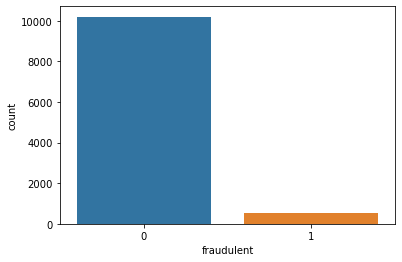

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train)

In [92]:
# if, baseline model이 최빈값일 경우

# mode() : 시리즈 내 가장 많이 분포가 나타난 값이 반환된다.
y_train.mode()

0    0
dtype: int64

In [93]:
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score

major = y_train.mode()[0]
y_pred = [major] * len(y_train)

print("training accuracy: ", accuracy_score(y_train, y_pred))

training accuracy:  0.9510626398210291


In [94]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred))


validation accuracy:  0.9532997762863534


In [95]:
train.describe()

,telecommuting,has_company_logo,has_questions,fraudulent,len_profile,len_description
count,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000,10728.000000
mean,0.042133,0.798005,0.494034,0.048937,622.505034,1215.198080
std,0.200901,0.401507,0.499988,0.215747,570.829686,893.543073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,134.000000,605.000000
50%,0.000000,1.000000,0.000000,0.000000,572.000000,1014.000000
75%,0.000000,1.000000,1.000000,0.000000,879.000000,1583.000000
max,1.000000,1.000000,1.000000,1.000000,6178.000000,12604.000000


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10728 entries, 16443 to 3665
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   department           10728 non-null  object
 1   telecommuting        10728 non-null  int64 
 2   has_company_logo     10728 non-null  int64 
 3   has_questions        10728 non-null  int64 
 4   employment_type      8628 non-null   object
 5   required_experience  6494 non-null   object
 6   required_education   5894 non-null   object
 7   industry             10728 non-null  object
 8   function             6856 non-null   object
 9   fraudulent           10728 non-null  int64 
 10  Jobs                 10728 non-null  object
 11  Country              10728 non-null  object
 12  len_profile          10728 non-null  int64 
 13  len_description      10728 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 1.5+ MB


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

mdl_linear = LinearRegression()

# 숫자형 특성을 사용
features = ["len_profile", "len_description"]
x_train = train[features]
x_val =  val[features]

# default, imputing 'mean' value
imputer = SimpleImputer()
x_train_imputed = imputer.fit_transform(x_train)
x_val_imputed = imputer.transform(x_val)

# fit and predict
mdl_linear.fit(x_train_imputed, y_train)
pred = mdl_linear.predict(x_val_imputed)

In [98]:
pd.Series(mdl_linear.coef_, features)

len_profile       -0.000058
len_description    0.000002
dtype: float64

In [99]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train_imputed, y_train)

print('검증세트 정확도', logistic.score(x_val_imputed, y_val))

검증세트 정확도 0.9532997762863534


In [100]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler

features = train.columns.drop(target)

x_train = train[features]
y_train = train[target]

x_val = val[features]
y_val = val[target]

x_train.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,Jobs,Country,len_profile,len_description
16443,Engineering,1,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Engineering,Engineer,US,333,813
15778,etc,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,etc,GR,213,1697
6781,etc,0,0,0,Full-time,Entry level,High School or equivalent,Education Management,Education,etc,US,0,618
15799,Sales,0,1,1,Full-time,Associate,Unspecified,Pharmaceuticals,Sales,etc,US,1341,859
16271,Marketing,0,1,1,Full-time,NaN,NaN,E-Learning,NaN,Manager,DE,651,348


In [101]:
encoder = OneHotEncoder(use_cat_names=True)
x_train_encoded = encoder.fit_transform(x_train)
x_val_encoded = encoder.transform(x_val)

x_train_encoded.head()

/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,department_Engineering,department_etc,department_Sales,department_Marketing,department_Technology,department_Development,department_Operations,department_Service,department_IT,department_Product,...,Country_GB,Country_NZ,Country_CA,Country_SG,Country_IL,Country_AU,Country_KR,Country_AE,len_profile,len_description
16443,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,333,813
15778,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,213,1697
6781,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,618
15799,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1341,859
16271,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,651,348


In [103]:
imputer = SimpleImputer(strategy='mean')
x_train_imputed = imputer.fit_transform(x_train_encoded)
x_val_imputed = imputer.transform(x_val_encoded)

x_val_imputed[:5]

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 8.790e+02,
        2.842e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.014e+03,
        2.930e+03],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        8.620e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.250e+03,
        4.150e+02],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.050e+03,
        1.174e+03]])

In [104]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_imputed)
x_val_scaled = scaler.transform(x_val_imputed)

x_train_scaled

array([[ 5.53588455, -2.0674468 , -0.19756386, ..., -0.05206279,
        -0.50718898, -0.45013703],
       [-0.18063961,  0.48368838, -0.19756386, ..., -0.05206279,
        -0.7174191 ,  0.53922904],
       [-0.18063961,  0.48368838, -0.19756386, ..., -0.05206279,
        -1.09057756, -0.66837955],
       ...,
       [-0.18063961, -2.0674468 , -0.19756386, ..., -0.05206279,
        -1.09057756, -0.06401566],
       [-0.18063961, -2.0674468 , -0.19756386, ..., 19.20757753,
        -0.48091022, -0.78029879],
       [-0.18063961,  0.48368838, -0.19756386, ..., -0.05206279,
         0.71740147, -0.18488843]])

In [105]:
x_train_scaled.T[0].mean(), x_train_scaled.T[0].std()

(-6.6232544347511204e-18, 0.9999999999999997)

In [106]:
model = LogisticRegression(random_state=1)
model.fit(x_train_scaled, y_train)

/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [107]:
coefficients = pd.Series(model.coef_[0], x_train_encoded.columns)
coefficients

department_Engineering    0.549516
department_etc            0.016357
department_Sales          0.066854
department_Marketing     -0.173821
department_Technology     0.344335
                            ...   
Country_AU                0.281132
Country_KR               -0.035974
Country_AE               -0.049315
len_profile              -0.751512
len_description          -0.168717
Length: 240, dtype: float64

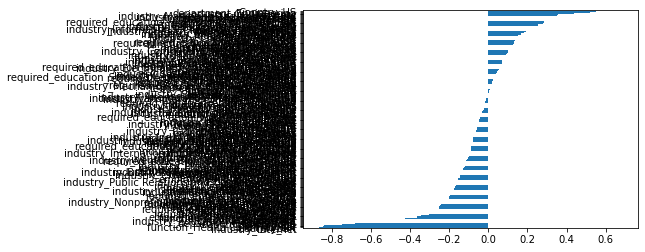

In [108]:
coefficients.sort_values().plot.barh();

In [111]:
x_test = test[features]
x_test_encoded = encoder.transform(x_test)
x_test_imputed = imputer.transform(x_test_encoded)
x_test_scaled = scaler.transform(x_test_imputed)

y_pred_test = model.predict(x_test_scaled)

In [112]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Use pipeline
pipe = make_pipeline(
    OneHotEncoder(), 
    SimpleImputer(), 
    StandardScaler(), 
    LogisticRegression(n_jobs=-1)
)
pipe.fit(x_train, y_train)

print('검증세트 정확도', pipe.score(x_val, y_val))

y_pred = pipe.predict(x_test)

/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


검증세트 정확도 0.9625279642058165


/mnt/d/anaconda3/envs/py_ML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
pipe.named_steps

{'onehotencoder': OneHotEncoder(cols=['department', 'employment_type', 'required_experience',
                     'required_education', 'industry', 'function', 'Jobs',
                     'Country']),
 'simpleimputer': SimpleImputer(),
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(n_jobs=-1)}